# The Model Project (BCG group) 
##  OLG Model

In [1]:
#importing the necessary packages 

import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm

**General assumptions:**
1. Closed economy with no government and no unemployment
2. One final good is consumed or invested to produce additional output
3. All markets are competitive
4. Firms and households have perfect foresight about all economic variables

**Firm's Problem**

The **production function** is a **Cobb-Douglas** with the format of:

\\[ Y_{t} = K_{t}^{\alpha}(A_{t}L_{t})^{1-\alpha}\\]

where:

1. $Y_t = F(K_t,A_tL_t)$ is the produced output  

* $K_t$ is the capital

* $L_t$ is the labor force, growing exogenously at rate $n$,\\[L_{t+1} = {(1-n)} L_{t}\\]

* $A_t$ is the index of technological progress, growing exogenously at rate of $g$,\\[A_{t+1} = {(1-g)} A_{t}\\] 

* $a$ is the share of physical capital and 0 < $a$ < 1

**Note 1:** It is assumed that capital ($K_{t}$) depreciates at rate $\delta$ per period, too. 

**Note 2:** It is more convenient to write $Y_{t}$ and $K_{t}$ per effective worker, so \\[y_{t} = \frac {Y_{t}}{A_{t}L_{t}}\\] and \\[k_{t} = \frac {K_{t}}{A_{t}L_{t}}\\]

**Note 3:** The firm is trying to maximize its profits under perfect competition and no-adjustment costs. So, in the equillibrium firms want to equalise both **Marginal Products $(MPK_t, MPL_t)$** with their rental rates **($r_{t} + \delta$, $w_{t}$)**, respectively. 

**FOC's** of the production fuction

\\[ MPK_{t} : {\alpha}k_{t}^{\alpha-1} = r_{t}+{\delta}\\]

\\[ MPL_{t} : {1-\alpha}A_{t}k_{t}^{\alpha} = w_{t}\\]

In [2]:
# Activating pretty printing
sm.init_printing(use_unicode=True)

In [3]:
# Defining symbolically the necessary variables
alpha = sm.symbols('alpha') # share of physical capital
k = sm.symbols ('k_t') 
r = sm.symbols('r_t') # interest rate
delta = sm.symbols('delta') # depreciation rate of capital per period
w = sm.symbols('w_t') # wage 
A = sm.symbols('A_t') # technological index

# Checking that our variables have the proper format
alpha, k, r, delta, w, A

In [4]:
# Defining the two FOC's and setting them equal with their rental rates
MPK = sm.Eq((alpha*k**(alpha-1)), r+delta)
MPL = sm.Eq (((1-alpha)*A*k), w)

MPK, MPL

Solve in **three steps**:

1. **Isolate** $k_t$ from $MPK_t$
2. **Substitute** in $MPL_t$
3. **Solve** for $w_t$ 

**Note:** Maybe explain why we want to calculate the wage

**Step 1: Isolate**

In [5]:
Kappa = sm.solve(MPK, k)
Kappa

**Note:** This is the equation that expresses the **Demand** of capital per worker ($k_{t}$). So, we convert it to a function

**Step 2: Substitute**

In [6]:
G = MPL.subs(k, Kappa[0])
G

**Step 3: Solve**

In [7]:
Wage = sm.solve(G, w) 

Wage

**Household's problem**

It tries to maximize its utility, given by the function: 

\\[ \max_{c_{1,t},c_{2,t+1}}U = ln{(c_{1,t})} + \beta ln{(c_{2,t+1})}\\]

\\[ \text{ s.t. } \\]

\\[z_{t+1} = w_t - c_{1,t} \\]

\\[c_{2,t+1} = z_{t+1}(1 + r_{t+1})\\]

where:

1. $c_{1,t}$ consumption at period $t$
* $c_{2,t+1}$ consumption at period $t+1$
* $w_t$ wage
* $r_{t+1}$ interest rate 
* $\beta$ is the subjective discount factor, 0 < $\beta$ < 1
* $z_{t+1}$ is the financial assets held at the beginning of period $t+1$ by the households born at time $t$

**Note:** It is assumed that each household borns and dies with no assets $\alpha_{t}$ = 0, $\alpha_{t+2}$ = 0 

In [8]:
# Defining symbolically the necessary variables
c1 = sm.symbols('c_1_t')
c2 = sm.symbols('c_2_t+1')
beta = sm.symbols('beta')
#z0 =sm.symbols('z_t')
#z2 = sm.symbols ('z_t+2')
z = sm.symbols('z_t+1') 
r1 = sm.symbols('r_t+1')
u = sm.symbols('U_t') #Utility
L = sm.symbols('L') #Langrange
omega = sm.symbols('omega') #The Langrangian multiplier

# Checking that our variables have the proper format
c1,c2, beta, w, z, r, L, omega

In [9]:
# Defining the utility function
def utility(c1, c2, beta):
    return (sm.log(c1) + beta*sm.log(c2))

Calculating the **Lifetime Budget Constraint** that will be used at the Langranian

In [10]:
#Defining the two budget constraints symbolically
budget_constraint_1 = sm.Eq(z, w - c1)
budget_constraint_2 = sm.Eq(c2, z*(1+r1))

budget_constraint_1, budget_constraint_2

Solve in **three steps**:

1. **Solve** $z_{t+1}$ from the budget constraint 1
2. **Substitute** in budget constraint 2
3. **Solve** for $w_t$

**Step 1: Solve**

In [11]:
z_from_constraint = sm.solve(budget_constraint_1, z)
z_from_constraint

**Step 2: Substitute**

In [12]:
z_subs_constraint = budget_constraint_2.subs(z, z_from_constraint[0])
z_subs_constraint

**Step 3: Solve**

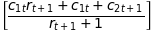

In [13]:
lifetime_budget_constraint = sm.solve(z_subs_constraint, w)
lifetime_budget_constraint

So, the households try to maximize their utility under the **Lifetime Budget Constraint**

\\[ \max_{c_{1,t},c_{2,t+1}}U = ln{(c_{1,t})} + \beta ln{(c_{2,t+1})}\\]

\\[ \text{ s.t. } \\]

\\[c_{1,t} + \frac {c_{2,t+1}}{(1 + r_{t+1})} = w_{t}\\]

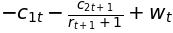

In [14]:
# Defining the Lifetime Budget Constraint symbolically
budget_constraint = w - c1 - c2/(1+r1)
budget_constraint

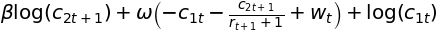

In [15]:
#Constructing the Langrangian
Langrangian = utility(c1, c2, beta) + omega * budget_constraint
Langrangian

Solve in **six steps**:

1. **Calculate** the two FOCs wrt. $c_{1,t}$ and $c_{2,t+1}$
2. **Isolate** the first FOC for $\omega$
3. **Substitute** in the second FOC
4. **Isolate** the second FOC for $c_{1,t}$
5. **Substitute** into the Lifetime Budget Constraint
6. **Solve** the acquired equation for $c_{2,t+1}$

**Step 1: Calculate** the FOCs

In [16]:
foc1 = sm.diff(Langrangian, c1)
foc2 = sm.diff(Langrangian, c2)

foc1, foc2

**Step 2: Isolate**

In [17]:
foc_1 = sm.solve(foc1, omega)
foc_1

**Step 3: Substitute**

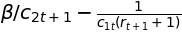

In [18]:
foc_2 = foc2.subs(omega, foc_1[0])
foc_2

**Step 4: Isolate** 

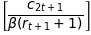

In [19]:
AB = sm.solve(foc_2, c1)
AB

**Step 5: Substitute** into the Lifetime Budget Constraint

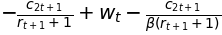

In [20]:
ABC = budget_constraint.subs(c1, AB[0])
ABC

**Step 6: Solve**

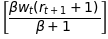

In [21]:
ABCD = sm.solve(ABC,c2)
ABCD

So, we found symbolically the consumption in period 2 ($c_{2,t+1}$). Now we want to find the **Supply** of capital per worker ($k_{t}$) in terms of interest rate, which will be given by the equation of the second budget constraint: $c_{2,t+1} = z_{t+1}(1 + r_{t+1})$ (solved wrt the assets held by the household ($z_{t+1}$)).

Solve in **four steps**:

1. **Define** the consumption in period 2 ($c_{2,t+1}$) symbolically
2. **Substitute** the wage (as calculated in the Firm's problem)
3. **Substitute** $c_{2,t+1}$ into the second budget constraint
4. **Solve** for $z_{t+1}$

**Step 1: Define** the consumption

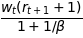

In [22]:
Consumption_2 = (1+r1)*(1/(1+1/beta))*w
Consumption_2

**Step 2: Substitute**

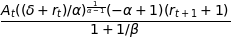

In [29]:
Final = Consumption_2.subs(w, Wage[0])
Final

**Step 3: Substitute**

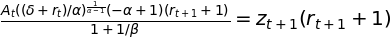

In [30]:
Final2 = budget_constraint_2.subs(c2, Final)
Final2

#Final3 = Final3.subs(r1, r)

**Step 4: Solve**

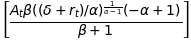

In [31]:
final3  = sm.solve(Final2, z) # Final Supply for capital
final3

To find the general equillibrium we have to equalize the **Supply** and the **Demand** as calculated in the Firm's and Household's problems, respectively. Also, the solution will be stationary, meaning that we can set $r_{t}$ = $r_{t+1}$. 

In [26]:
def f(final4, Kappa):
    return (final4- Kappa)

In [27]:
def bisection(f,a,b,max_iter=500,tol=1e-6,full_info=False):
    """ bisection
    
    Solve equation f(x) = 0 for a <= x <= b.
    
    Args:
    
        f (function): function
        a (float): left bound
        b (float): right bound
        tol (float): tolerance on solution
        
    Returns:
    
        m (float): root
    
    """
    
    # test inputs
    if f(a)*f(b) >= 0:
        print("bisection method fails.")
        return None
    
    # step 1: initialize
    _a = a
    _b = b
    a = np.zeros(max_iter)
    b = np.zeros(max_iter)
    m = np.zeros(max_iter)
    fm = np.zeros(max_iter)
    a[0] = _a
    b[0] = _b
    
    # step 2-4: main
    i = 0
    while i < max_iter:
        
        # step 2: midpoint and associated value
        m[i] = (a[i]+b[i])/2
        fm[i] = f(m[i])
        
        # step 3: determine sub-interval
        if abs(fm[i]) < tol:
            break        
        elif f(a[i])*fm[i] < 0:
            a[i+1] = a[i]
            b[i+1] = m[i]
        elif f(b[i])*fm[i] < 0:
            a[i+1] = m[i]
            b[i+1] = b[i]
        else:
            print("bisection method fails.")
            return None
        
        i += 1
        
    if full_info:
        return m,i,a,b,fm
    else:
        return m[i],i

In [28]:
m,i = bisection(f,-8,7)
print(i,m,f(m))

TypeError: f() missing 1 required positional argument: 'Kappa'